In [22]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

fulldata=pd.read_csv('AdmissionDataset/data.csv')
fulldata=fulldata.drop(columns=['Serial No.'])

data,testdata=np.split(fulldata,[int(.8*len(fulldata))])

outputdata=data[data.columns[-1]]
inputdata = data[data.columns[0:7]]

In [23]:
mean=np.mean(inputdata)
stdev=np.std(inputdata)

In [24]:
mean

GRE Score            316.338889
TOEFL Score          107.188889
University Rating      3.116667
SOP                    3.379167
LOR                    3.479167
CGPA                   8.576250
Research               0.555556
dtype: float64

In [25]:
col = inputdata['GRE Score']
normcol = [(1.0 * (c-mean['GRE Score']))/stdev['GRE Score'] for c in col]

[0.05776236932321319, 0.23250567147747525, 0.49462062470886836, 0.8441072290173924, 0.23250567147747525, -1.2528123968337523, 0.49462062470886836, -0.8159541414480972, -0.11698093283104888, -1.7770423032965386, 0.05776236932321319, 0.5819922757859994, -0.641210839293835, 0.40724897363173734, 1.4557087865573097, -0.029609281753917843, 1.3683371354801788, 0.6693639268631304, -1.2528123968337523, -1.5149273500651455, -1.6022990011422764, -0.379095886062442, -1.6022990011422764, -0.7285824903709661, 0.9314788800945235, -0.379095886062442, 0.7567355779402615, -0.5538391882167041, 1.2809654844030476, 1.2809654844030476, 0.40724897363173734, -0.9033257925252282, 0.14513402040034423, 0.9314788800945235, -0.2043525839081799, -0.11698093283104888, -1.7770423032965386, -1.3401840479108833, -0.466467537139573, -0.379095886062442, 0.49462062470886836, 1.6304520887115719, -0.379095886062442, -1.0780690946794902, -0.9033257925252282, -1.6022990011422764, 1.5430804376344407, 1.3683371354801788, -0.990

In [26]:
ones=[]
for i in range(len(data)):
    ones.append(1)

In [27]:
X=[]
X.append(ones)

In [28]:
for i in range(len(inputdata.columns)):
    col = inputdata[inputdata.columns[i]]
    normcol = [(1.0 * (c-mean[i]))/stdev[i] for c in col]
    X.append(normcol)
X=np.array(X)

In [29]:
B = np.ones(len(inputdata.columns)+1)
Y = np.array(outputdata)

In [39]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((np.dot(B,X) - Y) ** 2)
    J=J/m
    return J

In [1]:
def MPE(X,Y,B):
    m = len(Y)
    J = np.sum(np.divide(np.absolute((np.dot(B,X) - Y))),np.dot(B,X))
    J=J/m * 100
    return J

In [ ]:
def MAE(X,Y,B):
    m = len(Y)
    J = np.sum((np.dot(B,X) - Y))
    J=J/m
    return J

In [40]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

0.03500532852622538


In [41]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(inputdata)
    
    for iteration in range(iterations):
        h = np.dot(B,X)
        loss = h - Y
        gradient = np.dot(loss,X.T) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B,cost_history

In [42]:
B,cost_history = gradient_descent(X, Y, B, 0.01, 100)
print(B)

[ 0.75915013  0.00374347  0.0167562   0.01677667  0.01314485  0.05092319
 -0.007463    0.08427179]


In [43]:
def predict(row, B):
    y=B[0]
    i=1
    for r in row:
        y+=r*B[i]
        i+=1
    return y

In [44]:
def validate(B,testdata):
    validatedata = []
    for i in range(len(testdata.columns)-1):
        col = testdata[testdata.columns[i]]
        normcol = [1.0 * (c-mean[i])/stdev[i] for c in col]
        validatedata.append(normcol)
    
    validatevector= np.array(validatedata).T
 
    actual=testdata[testdata.keys()[-1]]

    predicted=[]
    for i in range(len(validatevector)):
        row=validatevector[i]
        y=predict(row,B)
        predicted.append(y)
    
    print(r2_score(actual,predicted))

In [45]:
 validate(B,testdata)

0.5504434498875579


In [46]:
cost_history

[0.0343779250978311,
 0.03377560993572995,
 0.0331966006448142,
 0.03263926862082925,
 0.032102125206145735,
 0.0315838091023727,
 0.031083074925515222,
 0.030598782799777752,
 0.030129888895566195,
 0.02967543682583359,
 0.02923454982272434,
 0.028806423623571917,
 0.028390320001758024,
 0.027985560883808654,
 0.02759152299943462,
 0.027207633016072076,
 0.026833363113885338,
 0.026468226961199923,
 0.026111776053975057,
 0.025763596386234985,
 0.025423305421387384,
 0.025090549337092257,
 0.024765000518831234,
 0.0244463552795871,
 0.024134331785098127,
 0.023828668166019314,
 0.023529120800020415,
 0.023235462748393894,
 0.022947482333148837,
 0.022664981841842104,
 0.02238777634855727,
 0.022115692640495826,
 0.02184856824060263,
 0.02158625051751907,
 0.021328595874948272,
 0.021075469013236706,
 0.020826742256630608,
 0.020582294940259996,
 0.020342012851443936,
 0.02010578772040185,
 0.019873516755902317,
 0.01964510222178708,
 0.019420451050676683,
 0.0191994744915002,
 0.01898

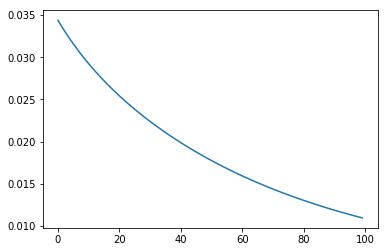

In [47]:
index =[]
for i in range(0,100):
    index.append(i)
plt.plot(index, cost_history)
plt.show()